In [2]:
!pip install gdown

In [6]:
!pip install opencv-python

     ---------------------------------------- 38.2/38.2 MB 1.9 MB/s eta 0:00:00


In [16]:
# The dataset is in japan, let's try to convert it


# Import
import gdown # To download the dataset
import glob
from zipfile import ZipFile
import os # Path managing
import json # Json file
import pandas as pd # To create dataset
import re
from PIL import Image # For image processing
# from google.colab import files # File download
import cv2 # Another image processing
import numpy as np # image processing
from numpy.linalg import norm # Normalize
import matplotlib.pyplot as plt # plot image
from tqdm import tqdm # Logging the time

# /content/IQON3000/2013200/3886103 # This is a sample directory

# Dump the functions here

In [9]:
# import os
# import json
# import pandas as pd

# base_directory = '/content/IQON3000'

# data = []

# for root, dirs, files in os.walk(base_directory):
#     for file in files:
#         if file == '3886103.json':  # Specify the JSON file name
#             file_path = os.path.join(root, file)
#             with open(file_path, 'r') as json_file:
#                 json_data = json.load(json_file)
                
#                 setId = json_data['setId']
#                 user = json_data['user']  # Get the 'user' value from the JSON
                
#                 for item in json_data['items']:
#                     itemId = item['itemId']
#                     imgUrl = item['imgUrl']
#                     price = item['price']
#                     itemName = item['itemName']
#                     colors = item['colors']
#                     expressions = item['expressions']
                    
#                     file_directory = os.path.join(base_directory, user, str(setId), str(itemId) + '_m.jpg')
                    
#                     data.append({
#                         'setId': setId,
#                         'file_directory': file_directory,
#                         'price': price,
#                         'itemName': itemName,
#                         'colors': colors,
#                         'expressions': expressions
#                     })

# df = pd.DataFrame(data)

In [ ]:
# # Mari coba path yang udah dibikin diatas, apakah work atau engga
# import matplotlib.pyplot as plt
# import matplotlib.image as mpimg

# # Specify the image path
# image_path = '/content/IQON3000/2013200/3886103/14377622_m.jpg'

# # Load and display the image
# image = mpimg.imread(image_path)
# plt.imshow(image)
# plt.axis('off')  # Turn off axis labels
# plt.show()

# # Mantap, work

In [ ]:
# # Create new columns "category" and "color" in the DataFrame
# df[['category', 'color']] = df['category_x_color'].str.split(' × ', expand=True)
# df['category_en'] = df['category'].apply(mtranslate.translate, to_language='en')
# df['color_en'] = df['color'].apply(mtranslate.translate, to_language='en')

# df.drop(columns=["category_x_color", "colors", "category", "color"], inplace=True)


In [ ]:
# Let's try this for x first json files in

# base_directory = '/content/IQON3000'
# num_files = 100  # Number of JSON files to process

# data = []

# count = 0
# for root, dirs, files in os.walk(base_directory):
#     for file in files:
#         if count >= num_files:
#             break
#         if file.endswith('.json'):  # Process only JSON files
#             file_path = os.path.join(root, file)
#             with open(file_path, 'r') as json_file:
#                 json_data = json.load(json_file)
                
#                 setId = json_data['setId']
#                 user = json_data['user']
                
#                 for item in json_data['items']:
#                     itemId = item['itemId']
#                     imgUrl = item['imgUrl']
#                     price = item['price']
#                     itemName = item['itemName']
#                     colors = item['colors']
#                     expressions = item['expressions']
#                     category_x_color = item['category x color']
                    
#                     file_directory = os.path.join(base_directory, str(user), str(setId), str(itemId) + '_m.jpg')
                    
#                     data.append({
#                         'setId': setId,
#                         'file_directory': file_directory,
#                         'price': price,
#                         'itemName': itemName,
#                         'colors': colors,
#                         'expressions': expressions,
#                         'category_x_color': category_x_color
#                     })
                
#             count += 1
#     if count >= num_files:
#         break

# df = pd.DataFrame(data)


# Pendahuluan

In [ ]:
# # Download the data
# import gdown

# file_id = '1sTfUoNPid9zG_MgV--lWZTBP1XZpmcK8'
# url = f'https://drive.google.com/uc?id={file_id}'

# output = '/content/dataset.zip'  # dataset

# gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1sTfUoNPid9zG_MgV--lWZTBP1XZpmcK8
To: /content/dataset.zip
100%|██████████| 7.57G/7.57G [01:26<00:00, 87.3MB/s]


'/content/dataset.zip'

In [19]:
# unzip the dataset
# ! unzip "IQON3000.zip"
# df = glob.glob('IQON3000.zip')
ZipFile('downloads/IQON3000.zip')

FileNotFoundError: [Errno 2] No such file or directory: 'downloads/IQON3000.zip'

# Let's check the dataset

In [11]:
# Function to List all the files

def list_files(directory):
  files = os.listdir(directory)
  for file in files:
      print(file)

# Function to print all the images in a directory
def print_images_in_directory(directory):
  image_files = []

  for root, dirs, files in os.walk(directory):
      for file in files:
          if file.lower().endswith(('.jpg', '.jpeg', '.png', '.gif')):
              image_files.append(os.path.join(root, file))

  for image_file in image_files:
      image = Image.open(image_file)
      print("\n")
      image.show()

# Function to read the json file
def read_json_file(directory):
  for filename in os.listdir(directory):
      if filename.endswith('.json'):
          file_path = os.path.join(directory, filename)
          with open(file_path, 'r') as file:
              json_content = json.load(file)
              print(json_content)


# CSV File Building

In [ ]:
# # This code is the same with the code above, but now it's for all the json file
# # Some json file is empty, let's just skip all of those empty file

# base_directory = '/content/IQON3000'

# data = []

# for root, dirs, files in os.walk(base_directory):
#     for file in files:
#         if file.endswith('.json'):  # Process only JSON files
#             file_path = os.path.join(root, file)
#             try:
#                 with open(file_path, 'r') as json_file:
#                     json_data = json.load(json_file)
                    
#                     setId = json_data['setId']
#                     user = json_data['user']
                    
#                     for item in json_data['items']:
#                         itemId = item['itemId']
#                         imgUrl = item['imgUrl']
#                         price = item['price']
#                         itemName = item['itemName']
#                         colors = item['colors']
#                         expressions = item['expressions']
#                         category_x_color = item['category x color']
                        
#                         file_directory = os.path.join(base_directory, str(user), str(setId), str(itemId) + '_m.jpg')
                        
#                         data.append({
#                             'setId': setId,
#                             'file_directory': file_directory,
#                             'price': price,
#                             'itemName': itemName,
#                             'expressions': expressions,
#                             'category_x_color': category_x_color})
#             except Exception as e:
#                 print(f"Error processing JSON file: {file_path}")
#                 print(f"Error message: {str(e)}")
#                 continue

# df = pd.DataFrame(data)

In [4]:
df = pd.read_csv("/content/dataset.csv")

FileNotFoundError: ignored

In [ ]:
# Create new columns "category" and "color" in the DataFrame
df[['category', 'color']] = df['category_x_color'].str.split(' × ', expand=True)

# Map the category to clothes, bottom, and accessories
top_categories = ['ニット', 'ブラウス', 'コート', 'ジャケット', 'タンクトップ', 'カーディガン', 'トップス', 'パーカー', 'ダウンジャケット', 'インテリア', '水着', 'チュニック', '浴衣', 'ルームウェア', 'アンダーウェア', 'ワンピース']
bottom_categories = ['ロングパンツ', 'スカート', 'Tシャツ', 'ショートパンツ', 'ロングスカート']
accessories_categories = ['ピアス', 'ショルダーバッグ', 'パンプス', 'ネックレス', 'サンダル', 'ブレスレット', 'スニーカー', 'コスメ', '腕時計', 'トートバッグ', 'ブーツ', 'クラッチバッグ', 'ストール', 'ハット', 'ハンドバッグ', 'サングラス', 'レッグウェア', 'リング', 'メガネ', 'ヘアアクセサリー', 'リュック', 'キャップ', 'バッグ', 'ベルト', '靴', '帽子', 'フレグランス', 'ニット帽', 'ネイル', 'ボストンバッグ', '小物', '財布', '手袋', 'ボディケア', 'ブローチ', '傘', 'ファッション小物', 'ステーショナリー', 'アクセサリー', 'ルームシューズ']
df['category_mapped'] = df['category'].map(lambda x: 'Top' if x in top_categories else ('Bottom' if x in bottom_categories else 'Accessories'))

# Drop the unnecesarry column
df.drop(columns=["category_x_color", "category"], inplace=True)

In [ ]:
df["category_mapped"].value_counts()

Accessories    1137098
Top             377798
Bottom          275112
Name: category_mapped, dtype: int64

In [ ]:
# Export to a csv file
# output_file = '/content/dataset.csv'  # Specify the output file path

# df.to_csv(output_file, index=False)

# Uncomment to download the exported file
# from google.colab import files

# files.download('/content/dataset.csv')

In [ ]:
df.head()

,setId,file_directory,price,itemName,expressions,color,category_mapped
0,4011767,/content/IQON3000/2479945/4011767/40578648_m.jpg,"¥3,229",・レースビスチェドッキングプルオーバー,['アイテム説明シアーなレース生地を、ビスチェ風にドッキングしたデザインが旬顔のプルオーバー...,ベージュ,Bottom
1,4011767,/content/IQON3000/2479945/4011767/37671569_m.jpg,"¥12,312",STRIPE TAPERD PANTS,['アイテム説明＜2018 SPRING COLLECTION＞ ハリ感のある先染めツイルの...,緑（グリーン）,Bottom
2,4011767,/content/IQON3000/2479945/4011767/16017657_m.jpg,¥839,取寄SOLDOUT 細グログランサーモ中折れハット,['アイテム説明編地がポイントのサーモ中折れハット。細いグログランリボンに小さいプレートがフ...,ベージュ,Accessories
3,4011767,/content/IQON3000/2479945/4011767/37598810_m.jpg,"¥105,840",オープントゥサンダル,['アイテム説明-【送料】商品のサイズや重量、配送ルートよって異なる\r\n【配送期間】3～...,ピンク,Accessories
4,4011767,/content/IQON3000/2479945/4011767/41078755_m.jpg,"¥1,944",シェルピアス,['アイテム説明スクエア型のシェルとゴールドを組み合わせたピアスです。型押しテクスチャを施し...,ベージュ,Accessories


In [ ]:
df["category_mapped"].isnull().sum()

Output hidden; open in https://colab.research.google.com to view.

# Make dataset into a smaller size

# Feature Extraction

In [ ]:
# Import
import tensorflow as tf
from keras.applications.resnet import ResNet50, preprocess_input
from keras import Sequential
from keras.layers import GlobalMaxPooling2D

In [ ]:
# Prepare the base model
model = ResNet50(weights='imagenet', include_top=False, input_shape=(150,150,3))
model.trainable=False

In [ ]:
# Add global max pooling to the model
model = tf.keras.Sequential([
    model,
    GlobalMaxPooling2D()
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 5, 5, 2048)        23587712  
                                                                 
 global_max_pooling2d (Globa  (None, 2048)             0         
 lMaxPooling2D)                                                  
                                                                 
Total params: 23,587,712
Trainable params: 0
Non-trainable params: 23,587,712
_________________________________________________________________


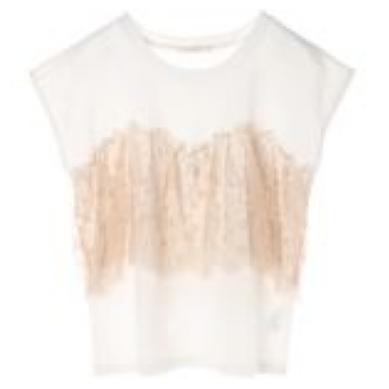

In [ ]:
# Load the image
img = cv2.imread("/content/IQON3000/2479945/4011767/40578648_m.jpg")

# Display the image using matplotlib
plt.imshow(img_rgb)
plt.axis('off')  # Turn off axis labels
plt.show()

In [ ]:
def extract_feature(img_path, model):
  # Read the image
  img = cv2.imread(img_path)
  # Convert to array
  img = np.array(img)
  # Expand dims to put the img number
  expand_img = np.expand_dims(img, axis=0)
  # Preprocess
  pre_img = preprocess_input(expand_img)
  # Process through model
  result = model.predict(pre_img).flatten()
  # Normalize
  normalized = result/norm(result)

  return normalized

In [ ]:
extract_feature("/content/IQON3000/2479945/4011767/37598810_m.jpg", model)

1/1 [==============================] - 0s 150ms/step


array([0.00462501, 0.01820162, 0.01394698, ..., 0.00577733, 0.01367161,
       0.0284748 ], dtype=float32)

In [ ]:
df.shape

(1790008, 7)

In [ ]:
# I want to try how long will it takes to extract features from only one folder

df_test = df[df['setId'] == 4011767]

In [ ]:
df_test.shape

(7, 7)

In [ ]:
# Export the filename
filename = df['file_directory'].tolist()

In [ ]:
feature_list = []

for file in tqdm(filename):
  feature_list.append(extract_feature(file,model))